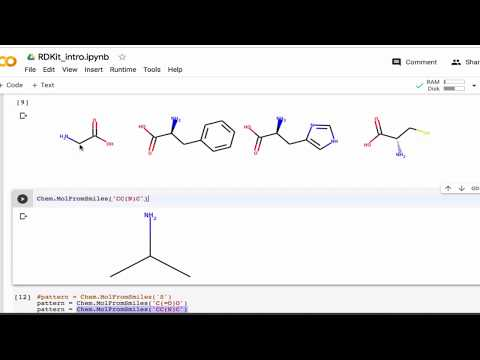

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ERvUf_lNopo')

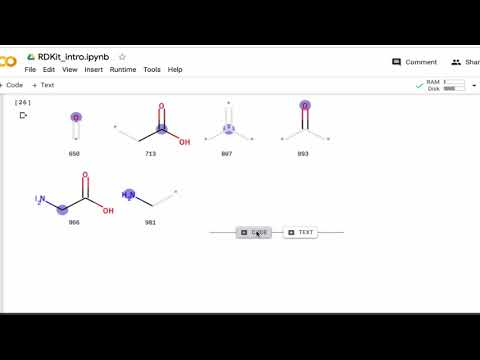

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('3qzZbaUzo9M')

RDkit基礎教程 
http://rdkit.chenzhaoqiang.com/basicManual.html#id27

#Part 0 : install

In [3]:
# INSTALL CONDA ON GOOGLE COLAB
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
! conda install -c rdkit rdkit -y
from rdkit import Chem

--2021-02-19 12:35:50--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   234MB/s    in 0.3s    

2021-02-19 12:35:51 (234 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

# Part 0.5 -- rdchem.so 檔案如何開啟

In [4]:
from rdkit.Chem.rdchem import Mol
from rdkit.Chem import rdchem
from rdkit import Chem
import rdkit

In [5]:
# 在所有地方搜尋名為(i不分大小寫)(iname ?)的資料夾(type d)
! find / -iname Chem -type d
print("----------------")
!cd /usr/local/lib/python3.7/site-packages/rdkit/Chem;ls -la

/usr/local/share/RDKit/Docs/Code/Chem
/usr/local/lib/python3.7/site-packages/rdkit/Chem
/usr/local/pkgs/rdkit-2020.09.1.0-py37hd50e099_1/share/RDKit/Docs/Code/Chem
/usr/local/pkgs/rdkit-2020.09.1.0-py37hd50e099_1/lib/python3.7/site-packages/rdkit/Chem
----------------
total 17408
drwxr-xr-x 21 root root    4096 Feb 19 12:37 .
drwxr-xr-x 17 root root    4096 Feb 19 12:37 ..
-rw-rw-r--  2 root root   15731 Oct 20 06:01 AllChem.py
drwxr-xr-x  3 root root    4096 Feb 19 12:37 AtomPairs
-rw-rw-r--  2 root root   35663 Oct 20 06:01 BRICS.py
-rw-rw-r--  2 root root   20973 Oct 20 06:01 BuildFragmentCatalog.py
-rw-rw-r--  2 root root     719 Oct 20 06:01 ChemicalFeatures.py
-rw-rw-r--  2 root root     363 Oct 20 06:01 ChemicalForceFields.py
drwxr-xr-x  3 root root    4096 Feb 19 12:37 ChemUtils
-rw-rw-r--  2 root root    6112 Oct 20 06:01 Crippen.py
-rw-rw-r--  2 root root    5880 Oct 20 06:01 Descriptors3D.py
-rw-rw-r--  2 root root    7889 Oct 20 06:01 Descriptors.py
drwxr-xr-x  3 root root 

In [ ]:
!objdump -tT /usr/local/lib/python3.7/site-packages/rdkit/Chem/rdchem.so
# rdchem.so 檔接下來還可以import Mol 但不知道如何查看
# 太多以省略

#Part 1

In [7]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

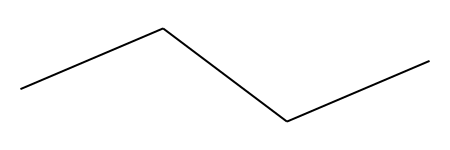

In [8]:
butane = Chem.MolFromSmiles("CCCC")
print(butane,"\n")
butane

You can turn molecule to SMILES code in this website
http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html

In [9]:
smiles = Chem.MolToSmiles(butane)
print(smiles)

CCCC


In [10]:
mw = Descriptors.MolWt(butane)
print("molecular weight(分子量) = ",mw)

molecular weight(分子量) =  58.123999999999995


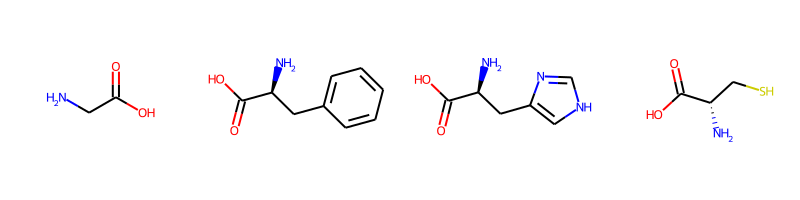

In [11]:
smiles_list = ["C(C(=O)O)N","N[C@@H](CC1=CC=CC=C1)C(O)=O","O=C([C@H](CC1=CNC=N1)N)O","C([C@@H](C(=O)O)N)S"]
name_list = ["Glycine","Phenylalanine","Histidine","Cysteine"]
mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)
img = Draw.MolsToGridImage(mol_list,molsPerRow = 4)
img

s_smile = NC(=O)CC[C@H](N)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CCC(N)=O)C(=O)O
s_smart = [#7]-[#6@](-[#6](=[#8])-[#7]-[#6@](-[#6](=[#8])-[#7]-[#6@](-[#6](=[#8])-[#8])-[#6]-[#6]-[#6](=[#8])-[#7])-[#6]-[#6]-[#6](=[#8])-[#7])-[#6]-[#6]-[#6](=[#8])-[#7]
s_fasta = >QQQ


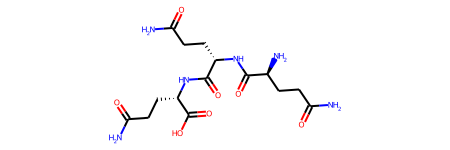

In [12]:
s_mol = Chem.MolFromFASTA("QQQ")
s_fasta = Chem.MolToFASTA(s_mol).replace("\n","")
s_smart = Chem.MolToSmarts(s_mol)
s_smile = Chem.MolToSmiles(s_mol)
s_pdb = Chem.MolToPDBBlock(s_mol)

print("s_smile =",s_smile)
print("s_smart =",s_smart)
print("s_fasta =",s_fasta)
s_mol

In [13]:
print("S_PDB of QQQ:")
print(s_pdb)

S_PDB of QQQ:
ATOM      1  N   GLN A   1       0.000   0.000   0.000  1.00  0.00           N  
ATOM      2  CA  GLN A   1       0.000   0.000   0.000  1.00  0.00           C  
ATOM      3  C   GLN A   1       0.000   0.000   0.000  1.00  0.00           C  
ATOM      4  O   GLN A   1       0.000   0.000   0.000  1.00  0.00           O  
ATOM      5  CB  GLN A   1       0.000   0.000   0.000  1.00  0.00           C  
ATOM      6  CG  GLN A   1       0.000   0.000   0.000  1.00  0.00           C  
ATOM      7  CD  GLN A   1       0.000   0.000   0.000  1.00  0.00           C  
ATOM      8  OE1 GLN A   1       0.000   0.000   0.000  1.00  0.00           O  
ATOM      9  NE2 GLN A   1       0.000   0.000   0.000  1.00  0.00           N  
ATOM     10  N   GLN A   2       0.000   0.000   0.000  1.00  0.00           N  
ATOM     11  CA  GLN A   2       0.000   0.000   0.000  1.00  0.00           C  
ATOM     12  C   GLN A   2       0.000   0.000   0.000  1.00  0.00           C  
ATOM     13  O

**PDB file Format** <br>
<a href="https://www.youtube.com/watch?v=_1q7sfjl2Kw">Computational Chemistry 1.2 - PDB File Format</a><br>
<a href="https://www.cnblogs.com/xiaojikuaipao/p/7256846.html">分子对接基础知识</a>


In [14]:
pattern = []
pattern.append(Chem.MolFromSmiles("S"))
pattern.append(Chem.MolFromSmiles("C(=O)O"))
pattern.append(Chem.MolFromSmiles("CC(N)C"))
pattern.append(Chem.MolFromSmarts("[#5]"))
molecule = ["S","C(=O)O","CC(N)C","[#5]"]
for n,p in enumerate(pattern):
  print(molecule[n],end="\t ")
  for mol in mol_list:
    print(mol.HasSubstructMatch(p),end="\t")
  print("")

S	 False	False	False	True	
C(=O)O	 True	True	True	True	
CC(N)C	 False	True	True	True	
[#5]	 False	False	False	False	


#Part 2

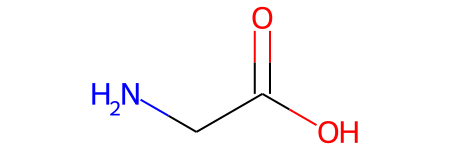

In [15]:
glycine = mol_list[0]
glycine

In [16]:
print(glycine)

In [17]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(glycine,radius=2,nBits=1024,bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
print("fp:",np.nonzero(fp_arr))
print("bi:",bi)
fp2 = []
[fp2.append(x) for x in fp.GetOnBits()] 
print("fp:",fp2)

fp: (array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)
bi: {27: ((0, 1),), 80: ((0, 0),), 147: ((4, 0),), 389: ((3, 1),), 650: ((2, 0),), 713: ((1, 1),), 807: ((1, 0), (3, 0)), 893: ((2, 1),), 966: ((0, 2),), 981: ((4, 1),)}
fp: [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]


(<rdkit.Chem.rdchem.Mol object at 0x7f65dc6571c0>, 27, {27: ((0, 1),), 80: ((0, 0),), 147: ((4, 0),), 389: ((3, 1),), 650: ((2, 0),), 713: ((1, 1),), 807: ((1, 0), (3, 0)), 893: ((2, 1),), 966: ((0, 2),), 981: ((4, 1),)})
(<rdkit.Chem.rdchem.Mol object at 0x7f65dc6571c0>, 80, {27: ((0, 1),), 80: ((0, 0),), 147: ((4, 0),), 389: ((3, 1),), 650: ((2, 0),), 713: ((1, 1),), 807: ((1, 0), (3, 0)), 893: ((2, 1),), 966: ((0, 2),), 981: ((4, 1),)})
(<rdkit.Chem.rdchem.Mol object at 0x7f65dc6571c0>, 147, {27: ((0, 1),), 80: ((0, 0),), 147: ((4, 0),), 389: ((3, 1),), 650: ((2, 0),), 713: ((1, 1),), 807: ((1, 0), (3, 0)), 893: ((2, 1),), 966: ((0, 2),), 981: ((4, 1),)})
(<rdkit.Chem.rdchem.Mol object at 0x7f65dc6571c0>, 389, {27: ((0, 1),), 80: ((0, 0),), 147: ((4, 0),), 389: ((3, 1),), 650: ((2, 0),), 713: ((1, 1),), 807: ((1, 0), (3, 0)), 893: ((2, 1),), 966: ((0, 2),), 981: ((4, 1),)})
(<rdkit.Chem.rdchem.Mol object at 0x7f65dc6571c0>, 650, {27: ((0, 1),), 80: ((0, 0),), 147: ((4, 0),), 389: ((

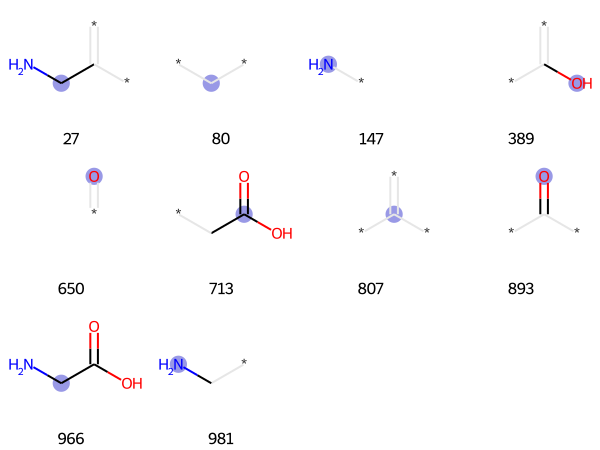

In [18]:
prints = []
# for x in fp.GetOnBits():
#   prints.append((glycine,x,bi))
# for x in prints:
  # print(x)
[prints.append((glycine,x,bi)) for x in fp.GetOnBits()] 
[print(x) for x in prints] 
Draw.DrawMorganBits(prints,molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()])

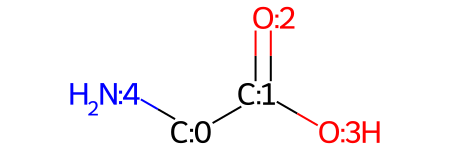

In [19]:
def add_atom_index(mol):
    mol_2 = mol
    atoms = mol_2.GetNumAtoms()
    for i in range( atoms ):
      mol_2.GetAtomWithIdx(i).SetProp('molAtomMapNumber', str(i))      
      # mol_2.GetAtomWithIdx(i).SetProp('molAtomMapNumber', str(mol_2.GetAtomWithIdx(i).GetIdx()))
    return mol_2
glycine_index = add_atom_index(glycine)
glycine_index

<font size="2">bi: {27: ((0, 1),), 80: ((0, 0),), 147: ((4, 0),), 389: ((3, 1),), 650: ((2, 0),), 713: ((1, 1),), 807: ((1, 0), (3, 0)), 893: ((2, 1),), 966: ((0, 2),), 981: ((4, 1),)},</font><br>
<font size="4">glycine = "C0(C1(=O2)O3)N4"</font><br>
<font size="4">bi: fp_num:((atom1_num,radius1),(atom2_num,radius2),...),</font><br>
<font size="4">bi: 形狀編號:((原子編號,半徑),),</font><br>





{1: ((3, 0),), 80: ((2, 0),), 227: ((4, 1),), 315: ((8, 2),), 589: ((10, 2),), 606: ((2, 1),), 632: ((3, 2),), 807: ((4, 0), (9, 0), (11, 0)), 875: ((12, 1),), 1057: ((0, 0),), 1152: ((1, 0),), 1362: ((3, 1),), 1365: ((5, 1),), 1367: ((1, 2),), 1380: ((5, 0), (8, 0), (10, 0)), 1430: ((0, 1),), 1434: ((5, 2),), 1475: ((7, 2),), 1602: ((9, 1), (11, 1)), 1607: ((8, 1), (10, 1)), 1750: ((6, 1), (7, 1)), 1784: ((12, 2),), 1853: ((6, 2),), 1868: ((2, 2),), 1873: ((6, 0), (7, 0), (12, 0)), 1995: ((1, 1),)}


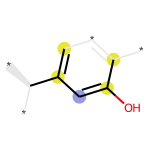

In [20]:
# get one fp on epinephrine
epinephrine = Chem.MolFromSmiles('CNC[C@H](O)c1ccc(O)c(O)c1')
bi = {}
prints = []
fp = Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(epinephrine, radius=2, bitInfo=bi)
print(bi)
Draw.DrawMorganBit(epinephrine,1784,bi)

摩根分子指纹计算https://www.jianshu.com/p/215defebb77d

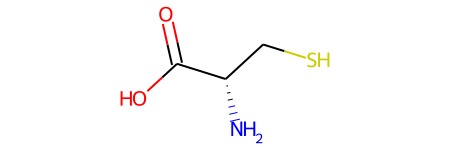

In [21]:
cysteine = mol_list[3]
cysteine

In [22]:
bi = {}
fp2 = AllChem.GetMorganFingerprintAsBitVect(cysteine,2,nBits=1024,bitInfo=bi)
print("cys",list(fp2.GetOnBits()))
print("gly",list(fp.GetOnBits()))
print("")

common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
print("Common = ",common)
combined = set(fp2.GetOnBits()) | set(fp.GetOnBits())
print("Combined = ",combined)
print("Common/Combined = ",len(common)/len(combined))
print("Similarity = ",DataStructs.TanimotoSimilarity(fp,fp2))

cys [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
gly [1, 80, 227, 315, 589, 606, 632, 807, 875, 1057, 1152, 1362, 1365, 1367, 1380, 1430, 1434, 1475, 1602, 1607, 1750, 1784, 1853, 1868, 1873, 1995]

Common =  {80, 1, 807}
Combined =  {1152, 1, 389, 902, 650, 786, 147, 403, 1430, 1434, 1057, 807, 48, 435, 820, 825, 315, 1853, 321, 1602, 1475, 1607, 1995, 1868, 589, 80, 1873, 1362, 1365, 1750, 1367, 606, 227, 1380, 229, 875, 632, 1784, 893}
Common/Combined =  0.07692307692307693
Similarity =  0.07692307692307693
